In [ ]:
# native
import os

# math
from math import ceil

# data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style

In [ ]:
DATA_DIR = '/home/daniel/Data/FeedbackPrize'

train_path = os.path.join(DATA_DIR, 'train.csv')
sample_path = os.path.join(DATA_DIR, 'sample_submission.csv')
train_text_path = os.path.join(DATA_DIR, 'train')

In [ ]:
# Get train csv
df = pd.read_csv(train_path)
# Get text files
text_names = [os.path.join(train_text_path, pth) for pth in os.listdir(train_text_path)]

In [20]:
df.head()['predictionstring']

'1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44'

In [7]:
df['discourse_type'].unique()

array(['Lead', 'Position', 'Evidence', 'Claim', 'Concluding Statement',
       'Counterclaim', 'Rebuttal'], dtype=object)

In [8]:
type_colors = {'Lead': Fore.RED, 'Position': Fore.BLUE, 'Evidence': Fore.LIGHTCYAN_EX, 'Claim': Fore.GREEN, 
               'Concluding Statement': Fore.MAGENTA, 'Counterclaim': Fore.YELLOW, 'Rebuttal': Fore.CYAN, 
               'None': Fore.WHITE}

In [9]:
def pretty_print_classes(text_path, df, type_colors):
    """
    Description:
        Prints out the given text in labelled and colored text.
    Parameters:
        text_path: Local path to text
        df: DataFrame containing relevant label information
        type_colors: Colors which to print the discourse types
    """
    desc = '\n'.join([color + name for name, color in type_colors.items()]) + \
           Fore.WHITE + '\n--------------\n'

    text = open(text_path).read()
    id = text_path.split('/')[-1].replace('.txt', '')
    classes = df[df['id'] == id].sort_values(by='discourse_start')
    cstart, cend = classes[['discourse_start', 'discourse_end']].astype(int).transpose().to_numpy().tolist()
    distype = classes['discourse_type'].values.tolist()

    cstart = [0] + cstart + [cend[-1]]
    cend   = [cstart[0]] + cend + [len(text)]
    distype = ['None'] + distype + ['None']

    s = ""
    for i in range(len(cstart)):
        s += type_colors[distype[i]] + text[cstart[i]:cend[i]]
        if i != len(cstart) - 1:
            s += Fore.WHITE + text[cend[i]: cstart[i + 1]]
    
    print(desc + s)

In [10]:
pretty_print_classes(text_names[0], df, type_colors)

Lead
Position
Evidence
Claim
Concluding Statement
Counterclaim
Rebuttal
None
--------------
Dear state senator,

Changing the vote from voting for a slate of electors to popular vote would be reasonable. I think that having to vote for a slate of electors is pretty hard knowing that you're basically just voting for people that's with one president or another president. Popular vote is a good idea because you can get a bit more accuracy from the votes.

Electorial college has 34 electors who "Can be anyone not holding office" also voters can get confused about who they're voting for. "Perhaps the most worrying is the prospect of a tie in the electorial vote." If there was a tie, it would have to be "thrown to the House Of Representatives, where state delegations vote on the president." We really dont want the House Of Representatives solving a tie for us. Unlike the popular vote where there is re-counts, the electorial college has none of that. If its a tie it gets passed on to another 

In [11]:
pretty_print_classes(text_names[6], df, type_colors)

Lead
Position
Evidence
Claim
Concluding Statement
Counterclaim
Rebuttal
None
--------------
Why is it benefitial for students for being able to attend classes from the comfortable of their home? Attending from home is one of the new ways of learning that is more effective and less stressful because they feel like it is one-on-one which makes them more comfortable to attend classes they feel like want to learn. Since home-schooling is very rare and less frequent, students will feel more specialized and focus more because they can literally stop their course from a button of one click any time they feel like and they can pick any classes they want that would fit their future career. So students would benefit from being able to attend classes from home because there are less distractions from their peers and classmates, more straight-forward to the given lessons and tasks, and they get to do anything they want between the breaks and even during the lesson.

Even though attending classes f

In [12]:
pretty_print_classes(text_names[226], df, type_colors)

Lead
Position
Evidence
Claim
Concluding Statement
Counterclaim
Rebuttal
None
--------------
The Electoral College has been around for many years. It is not an actual college, or location. It is a process where American citizens select their electors, however proceeding that the electors make their votes for President and Vice President; Congress counts for electoral votes. But, the Electoral College is a very controversial process, many people are for it, but many are also against it. Some even wanting to get 'rid of the Electoral College overall. We should ban the Electoral College for it does not satisfy American people.

Electors in the Electoral College can vote for whomever they want, giving American people the wrong idea and vote for the wrong presidential candidate. In the article (source 2) "The Indefensible Electoral College: Why even the best-laid defenses of the system are wrong" it states, "Can voters control whom their electors vote for? Not always. Do voters sometimes get

In [13]:
df['num_words'] = df['discourse_text'].str.split().apply(lambda x: len(x))

In [14]:
distype_n = df['discourse_type'].nunique()
graphs_per_row = 3

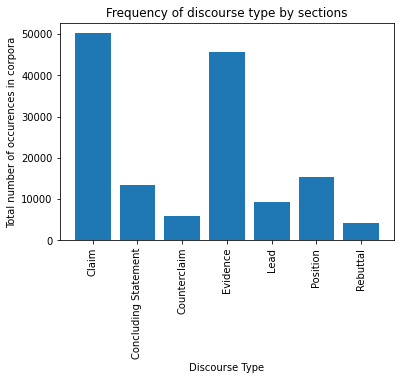

In [15]:
discourse_count = df.groupby('discourse_type')['id'].count()
plt.bar(discourse_count.index, discourse_count.values)
plt.xticks(rotation=90)
plt.ylabel('Total number of occurences in corpora')
plt.xlabel('Discourse Type')
plt.title('Frequency of discourse type by sections')
plt.show()

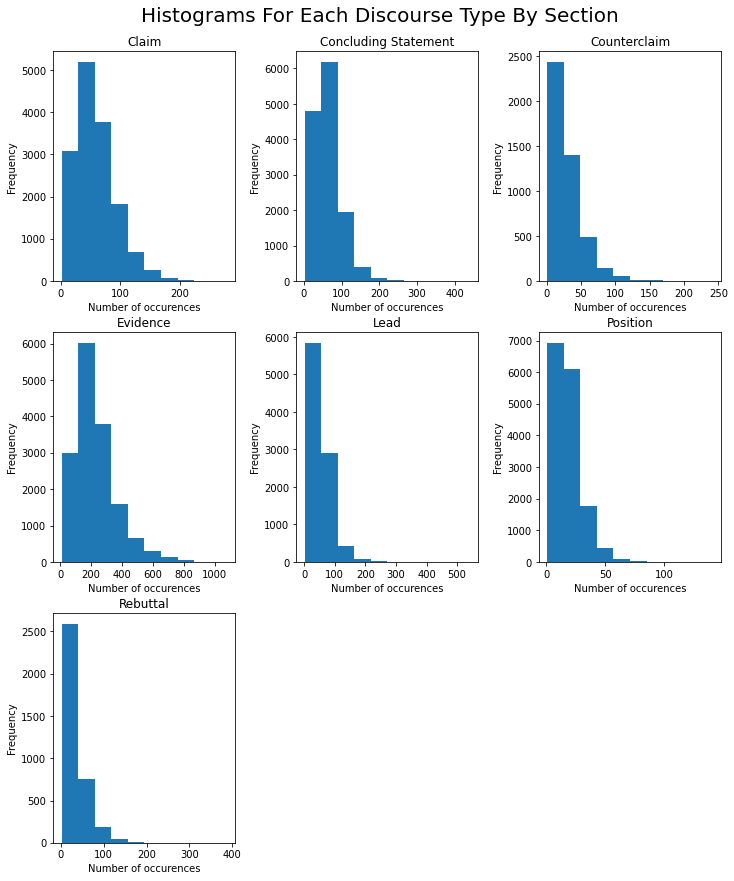

In [16]:
fig, axs = plt.subplots(ceil(distype_n / graphs_per_row), graphs_per_row, figsize=(10, 12))
fig.suptitle('Histograms For Each Discourse Type By Section', fontsize=20, y=1)
fig.tight_layout(h_pad=3, w_pad=3)
for i in range(np.product(axs.shape)):
    axs[i // 3, i % 3].axis('off')
for (t, grp), (i, j) in zip(df.groupby('discourse_type'), [(i // graphs_per_row, i % graphs_per_row) for i in range(distype_n)]):
    hist_grp = grp.groupby('id')['num_words'].sum().values
    axs[i][j].axis('on')
    axs[i][j].hist(hist_grp)
    axs[i][j].set_title(t)
    axs[i][j].set_xlabel('Number of occurences')
    axs[i][j].set_ylabel('Frequency')

plt.show()

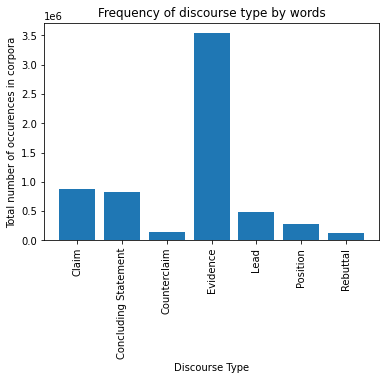

In [17]:
discourse_count = df.groupby('discourse_type')['num_words'].sum()
plt.bar(discourse_count.index, discourse_count.values)
plt.xticks(rotation=90)
plt.ylabel('Total number of occurences in corpora')
plt.xlabel('Discourse Type')
plt.title('Frequency of discourse type by words')
plt.show()

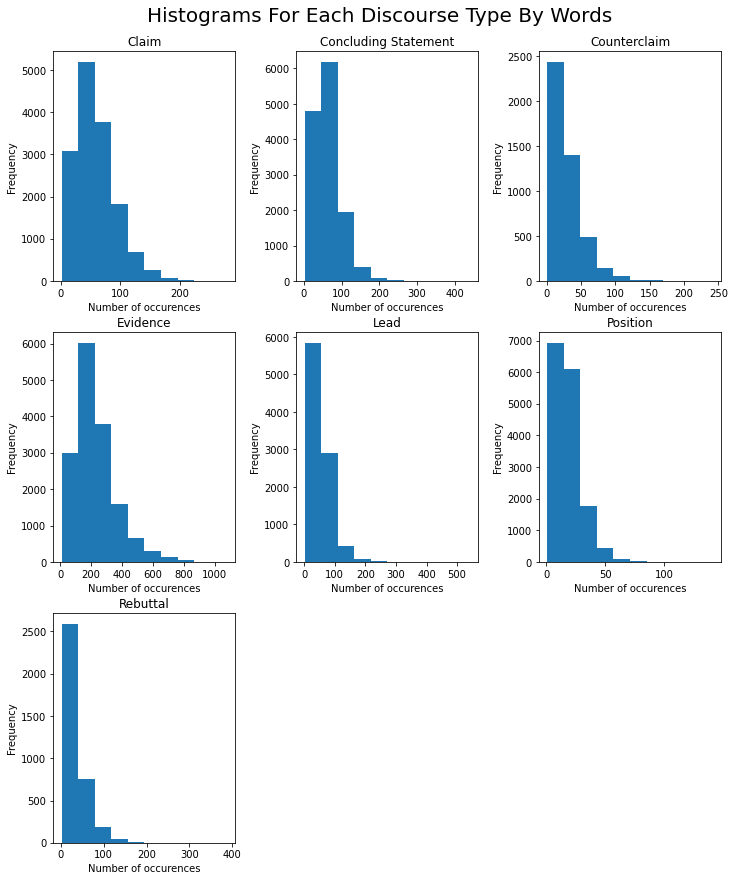

In [18]:
fig, axs = plt.subplots(ceil(distype_n / graphs_per_row), graphs_per_row, figsize=(10, 12))
fig.suptitle('Histograms For Each Discourse Type By Words', fontsize=20, y=1)
fig.tight_layout(h_pad=3, w_pad=3)
for i in range(np.product(axs.shape)):
    axs[i // 3, i % 3].axis('off')
for (t, grp), (i, j) in zip(df.groupby('discourse_type'), [(i // graphs_per_row, i % graphs_per_row) for i in range(distype_n)]):
    hist_grp = grp.groupby('id')['num_words'].sum().values
    axs[i][j].axis('on')
    axs[i][j].hist(hist_grp)
    axs[i][j].set_title(t)
    axs[i][j].set_xlabel('Number of occurences')
    axs[i][j].set_ylabel('Frequency')

plt.show()

# Insights
## Data
- The structure and grammar fluctuate pretty rapidly. Some of the exerpts are emails, and some are essays, etc.. Preprocessing will be needed to simplify the sentences so grammar and typos does not alter results. Different structures may be useful to the model.
- Classes are not organized into individual words, but starting indices and ending indices. We will need to turn this into word level labels, and then into indices after a model processes them.
- There exist cases where the class labels cover do not cover the entirety of a word. EX: classmates (c) -> evidence, (lassmates) -> claim. We can resolve these by either setting their class based on which type takes most of it. If no color, take a good guess.
- There is a decent class imbalance where evidence and claims tend to dominate the text. It is likely we could get decent performance by simply guessing these two classes. Some types such as counterclaim depends on the existence of a claim to exist. On the other hand, rebuttals depend on the existence of counterclaims to exist. 

## Discourse structure
- Lead: Should be outlining who, what, when, where and why. Appears first in the document. How a document can lead is decently random. Questions are also very likely a lead.
- Evidence: Summarizes events, statistics, facts. If a sentence contains information that is factual, it is likely evidence.  
- Claim: Suggest how a claim should be argued. 
- Position: An opionated part of the sentence, expect word like "should", "suggest", "can" which are not factual but indicate beliefs. It should be asserting something as true.
- Counterclaim: Infers against another claim. These should not be possible without the existence of base claim. 
- Concluding Statement: Appears at the end. Provides evidence but does not elaborate on it.
- Rebuttal: Appears after a counterclaim, and opposes that claim.
- None: No label given. Most likely error, sometimes text contains citations that don't matter though. 